#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print(f"train data: images: {x_img_train.shape} labels: {y_label_train.shape}")
print(f"test  data: images: {x_img_test.shape} labels: {y_label_test.shape}")

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test  data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [7]:
model = Sequential()
# 卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

W0708 01:54:10.154115  6388 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 01:54:10.168110  6388 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 01:54:10.171109  6388 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 01:54:10.188104  6388 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 01:54:10.196100  6388 deprecation.py:506] Fr

In [8]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [9]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

[Usage of loss functions 可參考KERAS官方文件](https://keras.io/losses/)

## binary_crossentropy

In [10]:
'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

W0708 01:54:10.341055  6388 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 01:54:10.362048  6388 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0708 01:54:10.367046  6388 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
train_history = model.fit(x_img_train_normalize,
                          y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=16,
                          verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 21s 526us/step - loss: 0.3100 - acc: 0.9001 - val_loss: 0.2972 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 19s 472us/step - loss: 0.2850 - acc: 0.9009 - val_loss: 0.2830 - val_acc: 0.9003
Epoch 3/10
40000/40000 [==============================] - 19s 471us/step - loss: 0.2702 - acc: 0.9025 - val_loss: 0.2707 - val_acc: 0.9006
Epoch 4/10
40000/40000 [==============================] - 19s 466us/step - loss: 0.2565 - acc: 0.9049 - val_loss: 0.2587 - val_acc: 0.9014
Epoch 5/10
40000/40000 [==============================] - 19s 466us/step - loss: 0.2463 - acc: 0.9070 - val_loss: 0.2498 - val_acc: 0.9028
Epoch 6/10
40000/40000 [==============================] - 19s 466us/step - loss: 0.2385 - acc: 0.9090 - val_loss: 0.2437 - val_acc: 0.9042
Epoch 7/10
40000/40000 [==============================] - 19s 467us/step - loss: 0.2311 - acc: 0.9110 - val_loss: 0.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()


In [13]:
# 看有哪些KEY
train_history.history

{'val_loss': [0.2971528668403626,
  0.28304463143348696,
  0.27068524711132047,
  0.25870948379039765,
  0.24980354969501495,
  0.24367810690402986,
  0.23782104260921477,
  0.2294633390903473,
  0.22678468596935272,
  0.21962710826396942],
 'val_acc': [0.9000099761962891,
  0.9003099772453308,
  0.9005699782371521,
  0.9014199790000915,
  0.9027599803924561,
  0.9042499804496765,
  0.9059699785232544,
  0.9084399746894837,
  0.908809974861145,
  0.912539970111847],
 'loss': [0.3099558222055435,
  0.28504867505431175,
  0.2701718569636345,
  0.2565015263557434,
  0.2462763429105282,
  0.2384885787129402,
  0.23113539135456085,
  0.22462519282698631,
  0.21956114653348924,
  0.21386027548611164],
 'acc': [0.9000974765300751,
  0.9009124776124954,
  0.902537477684021,
  0.9048874763965606,
  0.9070224749088287,
  0.9090349757909775,
  0.9109624768018723,
  0.9128274793148041,
  0.914632478761673,
  0.9166524798154831]}

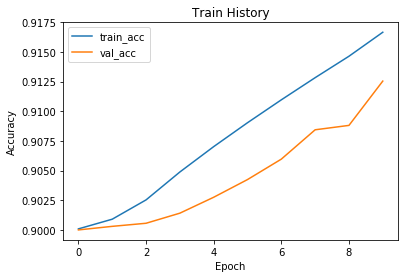

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

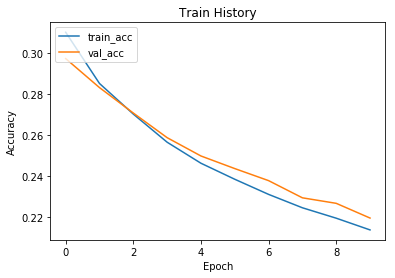

In [15]:
show_train_history(train_history, 'loss', 'val_loss')

## mse

In [16]:
model = Sequential()
# 卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize,
                          y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=16,
                          verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 18s 460us/step - loss: 0.0898 - acc: 0.1253 - val_loss: 0.0894 - val_acc: 0.1961
Epoch 2/10
40000/40000 [==============================] - 18s 452us/step - loss: 0.0890 - acc: 0.1641 - val_loss: 0.0888 - val_acc: 0.2345
Epoch 3/10
40000/40000 [==============================] - 18s 442us/step - loss: 0.0879 - acc: 0.1948 - val_loss: 0.0877 - val_acc: 0.2574
Epoch 4/10
40000/40000 [==============================] - 18s 438us/step - loss: 0.0863 - acc: 0.2277 - val_loss: 0.0861 - val_acc: 0.2801
Epoch 5/10
40000/40000 [==============================] - 18s 447us/step - loss: 0.0842 - acc: 0.2635 - val_loss: 0.0844 - val_acc: 0.3118
Epoch 6/10
40000/40000 [==============================] - 18s 445us/step - loss: 0.0824 - acc: 0.2938 - val_loss: 0.0831 - val_acc: 0.3313
Epoch 7/10
40000/40000 [==============================] - 18s 450us/step - loss: 0.0810 - acc: 0.3136 - val_loss: 0.

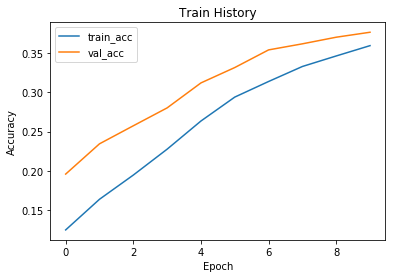

In [18]:
show_train_history(train_history, 'acc', 'val_acc')

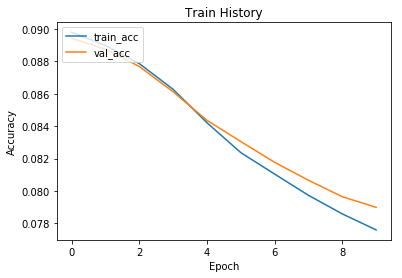

In [19]:
show_train_history(train_history, 'loss', 'val_loss')